# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

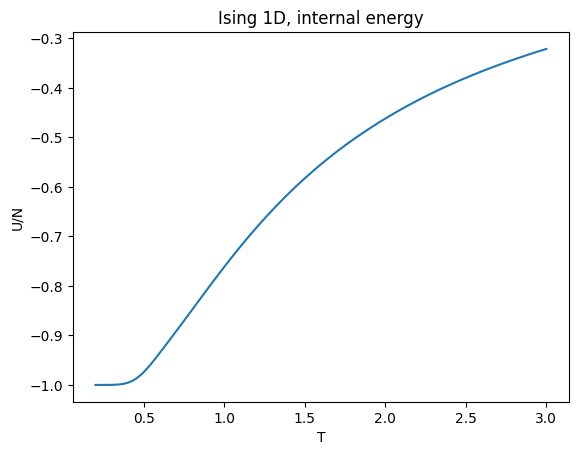

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

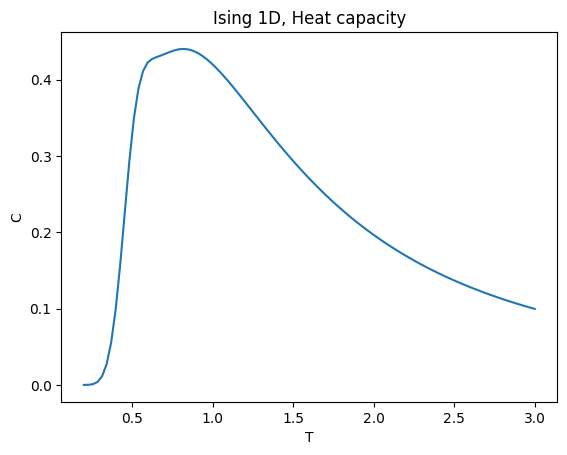

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

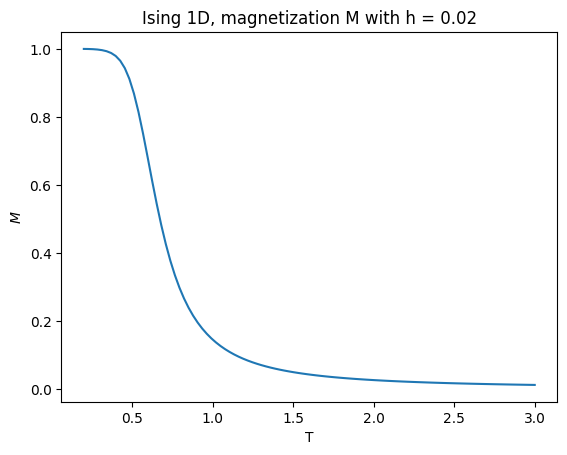

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

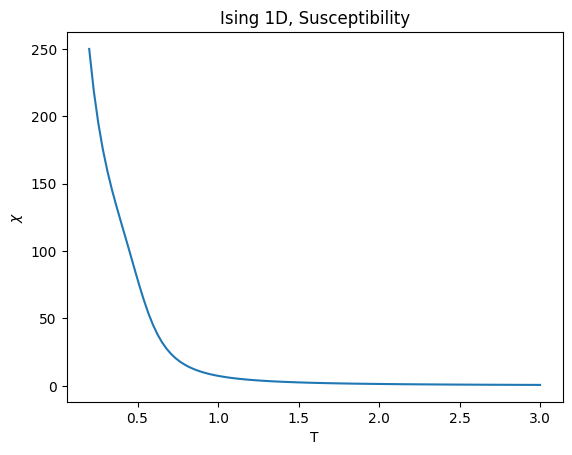

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$')
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

## Soluzione proposta

Per studiare le proprieta termodinamiche di un sistema, nel nostro caso un modello di Ising 1D, e' necessario mediare sugli stati del sistema, i quali a temperatura $T$ fissata saranno distribuiti secondo la densita' di probabilita' di Boltzmann:

$$\rho({s_i})=e^{(-\beta H)}$$

Per campionare gli stati del sistema si utilizza l'algoritmo di Metropolis: permette di campionare una qualunque distribuzione di probabilita' asintoticamente, anche senza conoscerne la normalizzazione.

### Funzionamento del Metropolis

   Il metodo consiste nell'esplorare lo spazio degli stati proponendo come spostamento da uno stato x a uno stato y del sistema il quale sara' accettata con probabilita' pari a min{$1,\frac{\rho(y)}{\rho(x)}$}.
   
   Nel caso in questione bisogna scegliere randomicamente uno spin da flippare, la mossa sara' accettata con probabilita' min{$1,e^{-\beta (E_{fin}-E_{in})}$}: la mossa sara' accetta sicuramente se l'energia del sistema diminuira', mentre, al contrario se dovesse aumentare sara' accettata a seconda dell'incremnto di energia e della temperatura a cui si sta lavorando.
   
   Asintoticamente gli stati prodotti saranno distributi secondo la distribuzione di Boltzmann.
   
#### Algoritmo di Gibbs

Il metodo di Gibbs consiste nello scegliere a priori la mossa da effettuare in modo da garantire una accettazione del 100%:
   
#### Osservazioni sulla temperatura

La temperatura gioca un ruolo fondamentale nel livello di accettabilita' del sistema e di conseguenza sulla possibilita' di esplorare lo spazio degli stati: temperatura basse, a cui corrisponde come stato di equilibrio lo stato con tutti gli spin allineati, rendono difficile l'esplorazione, viceversa per temperature alte, la cui soluzione di equilibrio e' la soluzione con gli spin disordinati.

Nella soluzione proposta si parte sempre dalla configurazione con spin disordinati, ovvero temperatura tendente all'infinito, per poi arrivare alla configurazione di equilibrio tramite un processo di termalizzazione

### Termalizzazione

La configurazione iniziale difficilmente corrispondera' alla configurazione di equilibrio, pertanto sara' necessario far evolvere il sistema fino al raggiungimento di equilibrio: per i motivi spiegati precedentemente sara' sempre piu' difficile raggiungere temperature basse.

Sono di seguito riportati i processi di termalizzazione dei due metodi alle due temperature limite, descritti dal raggiungimento dell'equilibrio dell'energia interna $U$:



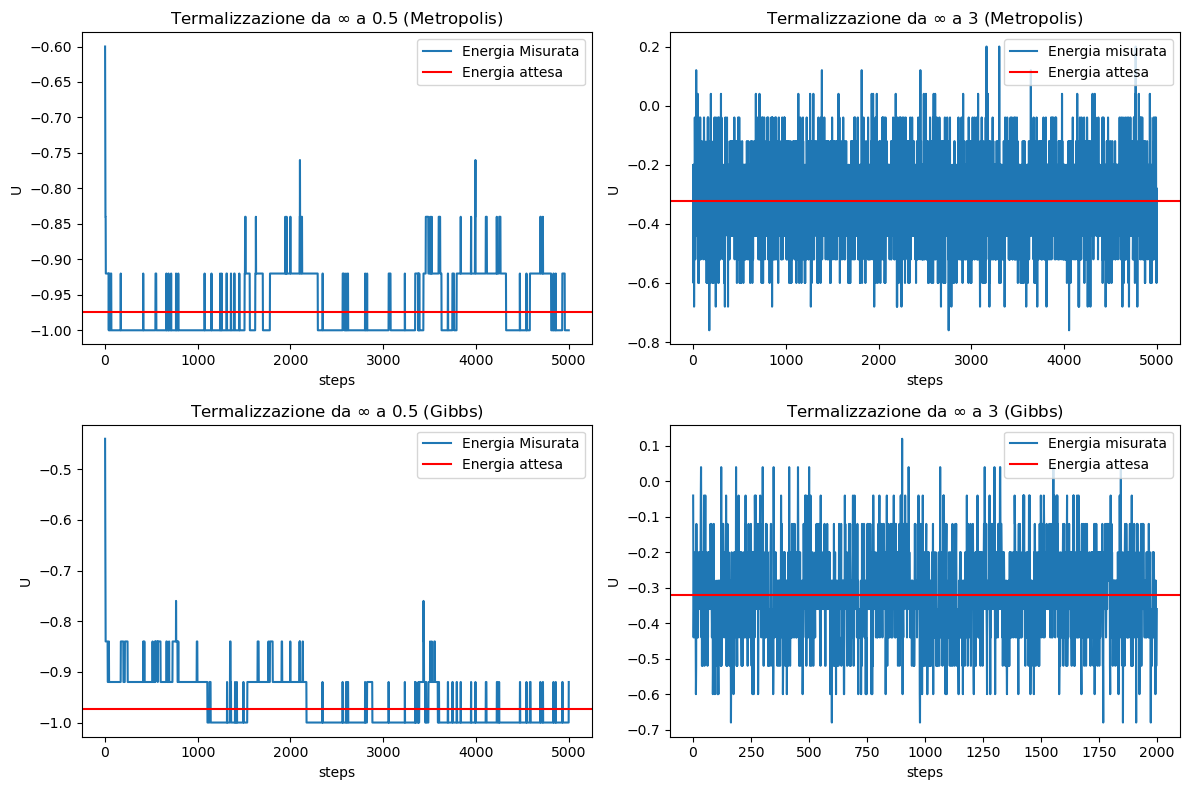

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per calcolare l'energia interna attesa
def energy(T):
    beta = 1/T
    J = 1.0
    Ns = 50
    th = np.tanh(J/T)
    thN = th**Ns
    ch = 1/th
    e = -J*(th + ch*thN)/(1 + thN)
    return e

# Carica i dati per Metropolis
eneIN = np.loadtxt("./ISING_1D/output_termaTini_M.dat")
eneFIN = np.loadtxt("./ISING_1D/output_termaTfin_M.dat")

# Carica i dati per Gibbs
eneIN_gibbs = np.loadtxt("./ISING_1D/output_termaTini_Gibbs.dat")
eneFIN_gibbs = np.loadtxt("./ISING_1D/output_termaTfin_Gibbs.dat")

# Crea i grafici per Metropolis
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Grafico per la termalizzazione Metropolis da infinito a 0.5
axs[0, 0].set_title(r'Termalizzazione da $\infty$ a 0.5 (Metropolis)')
axs[0, 0].plot(eneIN[:5000, 0], eneIN[:5000, 1], label='Energia Misurata')
axs[0, 0].axhline(energy(T[0]), color='red', label='Energia attesa')
axs[0, 0].set_xlabel("steps")
axs[0, 0].set_ylabel("U")
axs[0, 0].legend()

# Grafico per la termalizzazione Metropolis da infinito a 3
axs[0, 1].set_title(r'Termalizzazione da $\infty$ a 3 (Metropolis)')
axs[0, 1].plot(eneFIN[:5000, 0], eneFIN[:5000, 1], label='Energia misurata')
axs[0, 1].axhline(energy(T[1]), color='red', label='Energia attesa')
axs[0, 1].set_xlabel("steps")
axs[0, 1].set_ylabel("U")
axs[0, 1].legend()

# Crea i grafici per Gibbs
# Grafico per la termalizzazione Gibbs da infinito a 0.5
axs[1, 0].set_title(r'Termalizzazione da $\infty$ a 0.5 (Gibbs)')
axs[1, 0].plot(eneIN_gibbs[:5000, 0], eneIN_gibbs[:5000, 1], label='Energia Misurata')
axs[1, 0].axhline(energy(T[0]), color='red', label='Energia attesa')
axs[1, 0].set_xlabel("steps")
axs[1, 0].set_ylabel("U")
axs[1, 0].legend()

# Grafico per la termalizzazione Gibbs da infinito a 3
axs[1, 1].set_title(r'Termalizzazione da $\infty$ a 3 (Gibbs)')
axs[1, 1].plot(eneFIN_gibbs[:5000, 0], eneFIN_gibbs[:5000, 1], label='Energia misurata')
axs[1, 1].axhline(energy(T[1]), color='red', label='Energia attesa')
axs[1, 1].set_xlabel("steps")
axs[1, 1].set_ylabel("U")
axs[1, 1].legend()

# Regola lo spaziamento tra i subplots
plt.tight_layout()

# Mostra i grafici
plt.show()


### Commenti Termalizzazione  

Come si puo' notare i due algoritmi si comportano in modo equivalente.

Alla temperatura massima il sistema raggiunge l'equilibrio abbastanza rapidamente, al contrario per la temperatura minima sono necessarie un numero maggiore di mosse, questo dovuto alla difficolta' del sistema di cambiare stato per temperature basse.

Nonostante cio' 5000 mosse risultano piu' che sufficienti per il raggiungimento dell'equilibrio. Si specifica inoltre che nel calcolo delle grandezze medie si e' partiti sempre dalla configurazione del temperatura precedente e si e' raffredato man mano il sistema, garantendo pertanto il raggiungimento dell'equilibrio

## Stima delle propieta'  termodinamiche

Si presentano di seguito i valori delle varie grandezze ottenute mediando su 1000 blocchi da 100 passi ognuno, alle varie temperature

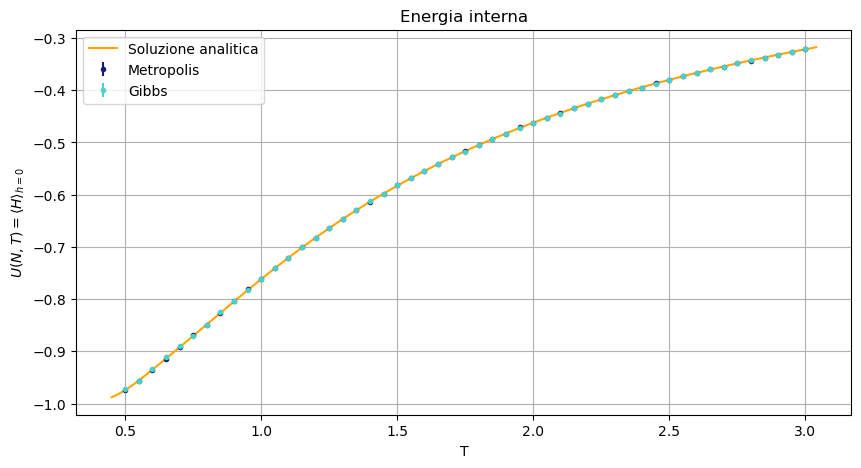

In [25]:
name = ["./ISING_1D/output_ene_curve_Metro.dat", "./ISING_1D/output_ene_curve_Gibbs.dat"]
title = "Energia interna"
label = ["Metropolis", "Gibbs"]
y_label = r"$U(N,T) = \langle H \rangle_{h=0}$"
x_label = "T"
color = ["midnightblue", "mediumturquoise"]

T = np.arange(0.45, 3.05, 0.01)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.figure(figsize=(10, 5))
plt.plot(T, e, label='Soluzione analitica', color = "orange")

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    plt.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i], fmt = '.', label=label[i])
    plt.title(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
plt.legend()
plt.show()

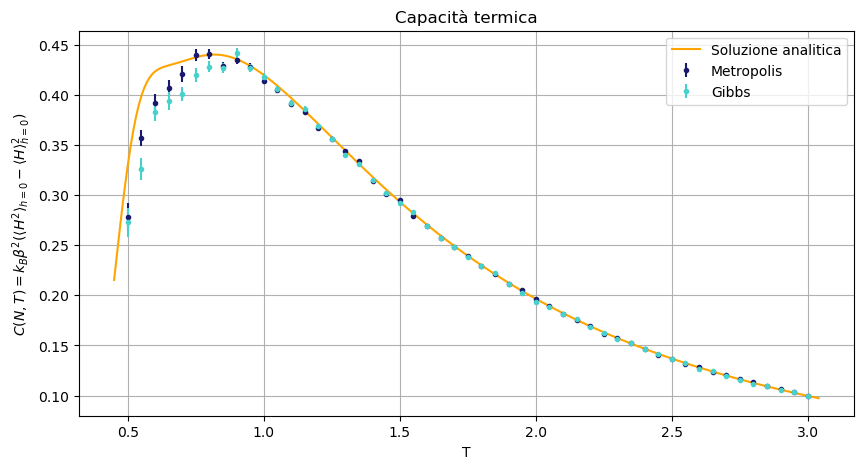

In [26]:
name = ["./ISING_1D/output_Cv_curve_Metro.dat","./ISING_1D/output_Cv_curve_Gibbs.dat"]
title = "Capacità termica"
label = ["Metropolis", "Gibbs"]
y_label = r"$C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$"
x_label = "T"
color = ["midnightblue", "mediumturquoise"]

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(10, 5))

plt.plot(T, heat, label='Soluzione analitica', color = "orange")

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    plt.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i], fmt = '.', label=label[i])
    plt.title(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
plt.legend()
plt.show()

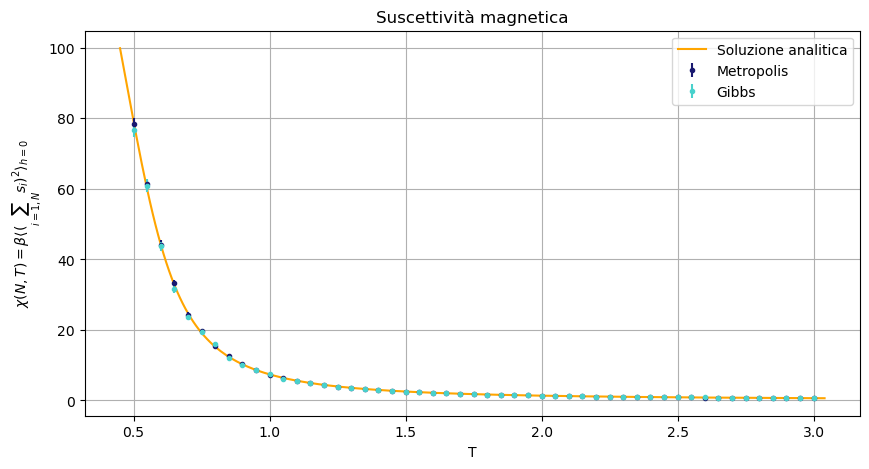

In [27]:
name = ["./ISING_1D/output_chi_curve_Metro.dat", "./ISING_1D/output_chi_curve_Gibbs.dat"]
title = "Suscettività magnetica"
label = ["Metropolis", "Gibbs"]



y_label = r"$\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$"
x_label = "T"
color = ["midnightblue", "mediumturquoise"]

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.figure(figsize=(10, 5))

plt.plot(T, X, label='Soluzione analitica', color = "orange")

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    plt.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i], fmt = '.', label=label[i])
    plt.title(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
plt.legend()
plt.show()

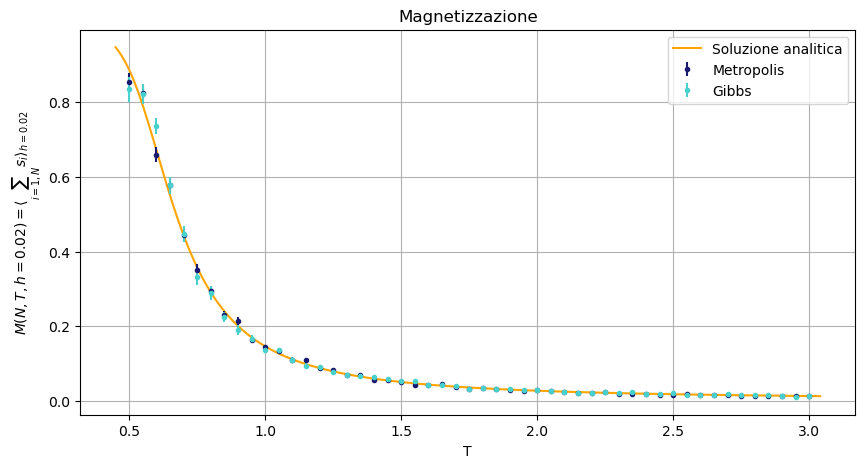

In [28]:
name = ["./ISING_1D/output_mag_curve_Metro.dat", "./ISING_1D/output_mag_curve_Gibbs.dat"]
title = "Magnetizzazione"
label = ["Metropolis", "Gibbs"]
y_label = r"$M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$"
x_label = "T"
color = ["midnightblue", "mediumturquoise"]

h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(10, 5))

plt.plot(T, M, label='Soluzione analitica', color = "orange")

for i in range(2): 
    
    data = np.loadtxt( name[i] )
    
    plt.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i], fmt = '.', label=label[i])
    plt.title(title, fontsize=12)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    
plt.legend()
plt.show()